<a href="https://colab.research.google.com/github/bhupeshmahara/smart-lead-scoring-engine/blob/main/Smart_Lead_Scoring_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# allow plots to appear directly in the notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("https://raw.githubusercontent.com/bhupeshmahara/smart-lead-scoring-engine/main/train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/bhupeshmahara/smart-lead-scoring-engine/main/test.csv")
submission_df = pd.read_csv("https://raw.githubusercontent.com/bhupeshmahara/smart-lead-scoring-engine/main/sample_submission.csv")

print(train_df.shape)
print(test_df.shape)
print(submission_df.shape)

(39161, 19)
(13184, 18)
(13184, 2)


In [3]:
train_df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [4]:
train_df.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [5]:
# checking for missing data in the train dataset

train_df.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

here we can see that 53% and 38% of products_purchased and signup_date are having null values, and we can not drop these columns also, as these are crucial for classifying the target.

In [6]:
train_df['products_purchased'].mode()

0    2.0
dtype: float64

In [7]:
train_df['signup_date'].mode()

0    2021-07-18
dtype: object

In [8]:
train_df['products_purchased'] = train_df['products_purchased'].fillna(train_df['products_purchased'].mode()[0])
train_df['signup_date'] = train_df['signup_date'].fillna(train_df['signup_date'].mode()[0])

train_df.isnull().sum()

id                      0
created_at              0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
signup_date             0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
dtype: int64

In [9]:
# checking for duplicate data in the final dataset

train_df[train_df.duplicated()].count()

id                      0
created_at              0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
signup_date             0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
dtype: int64

In [14]:
train_df['created_year'] = pd.DatetimeIndex(train_df['created_at']).year
train_df['created_month'] = pd.DatetimeIndex(train_df['created_at']).month
train_df['created_day'] = pd.DatetimeIndex(train_df['created_at']).day

train_df['signup_year'] = pd.DatetimeIndex(train_df['signup_date']).year
train_df['signup_month'] = pd.DatetimeIndex(train_df['signup_date']).month
train_df['signup_day'] = pd.DatetimeIndex(train_df['signup_date']).day

train_df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,created_year,created_month,created_day,signup_year,signup_month,signup_day
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,...,0,0,0,0,2021,1,1,2020,9,24
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,...,0,0,0,0,2021,1,1,2020,9,19
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,...,0,0,0,0,2021,1,1,2021,8,11
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,...,0,0,0,0,2021,1,1,2017,10,4
4,5,2021-01-01,4,6,2.0,2020-06-08,0,0,0,0,...,0,1,0,0,2021,1,1,2020,6,8


In [16]:
train_df.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy', 'created_year',
       'created_month', 'created_day', 'signup_year', 'signup_month',
       'signup_day'],
      dtype='object')

In [17]:
# re-arranging columns

train = train_df[['id', 'created_at', 'created_year', 'created_month', 'created_day', 'campaign_var_1', 'campaign_var_2', 'products_purchased',
                  'signup_date', 'signup_year', 'signup_month', 'signup_day', 'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
                  'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7', 'user_activity_var_8',
                  'user_activity_var_9', 'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12', 'buy']]

In [22]:
# drop columns 'created_at' and 'signup_date' since their data is extracted

train.drop(['created_at', 'signup_date'], axis=1, inplace = True)

In [23]:
train.columns

Index(['id', 'created_year', 'created_month', 'created_day', 'campaign_var_1',
       'campaign_var_2', 'products_purchased', 'signup_year', 'signup_month',
       'signup_day', 'user_activity_var_1', 'user_activity_var_2',
       'user_activity_var_3', 'user_activity_var_4', 'user_activity_var_5',
       'user_activity_var_6', 'user_activity_var_7', 'user_activity_var_8',
       'user_activity_var_9', 'user_activity_var_10', 'user_activity_var_11',
       'user_activity_var_12', 'buy'],
      dtype='object')

In [24]:
train.head()

,id,created_year,created_month,created_day,campaign_var_1,campaign_var_2,products_purchased,signup_year,signup_month,signup_day,...,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021,1,1,1,2,2.0,2020,9,24,...,0,0,0,1,1,0,0,0,0,0
1,2,2021,1,1,2,1,2.0,2020,9,19,...,0,0,0,1,0,0,0,0,0,0
2,3,2021,1,1,9,3,3.0,2021,8,11,...,0,0,0,0,0,0,0,0,0,0
3,4,2021,1,1,6,7,2.0,2017,10,4,...,0,0,0,0,0,0,0,0,0,0
4,5,2021,1,1,4,6,2.0,2020,6,8,...,0,0,0,1,0,0,0,1,0,0


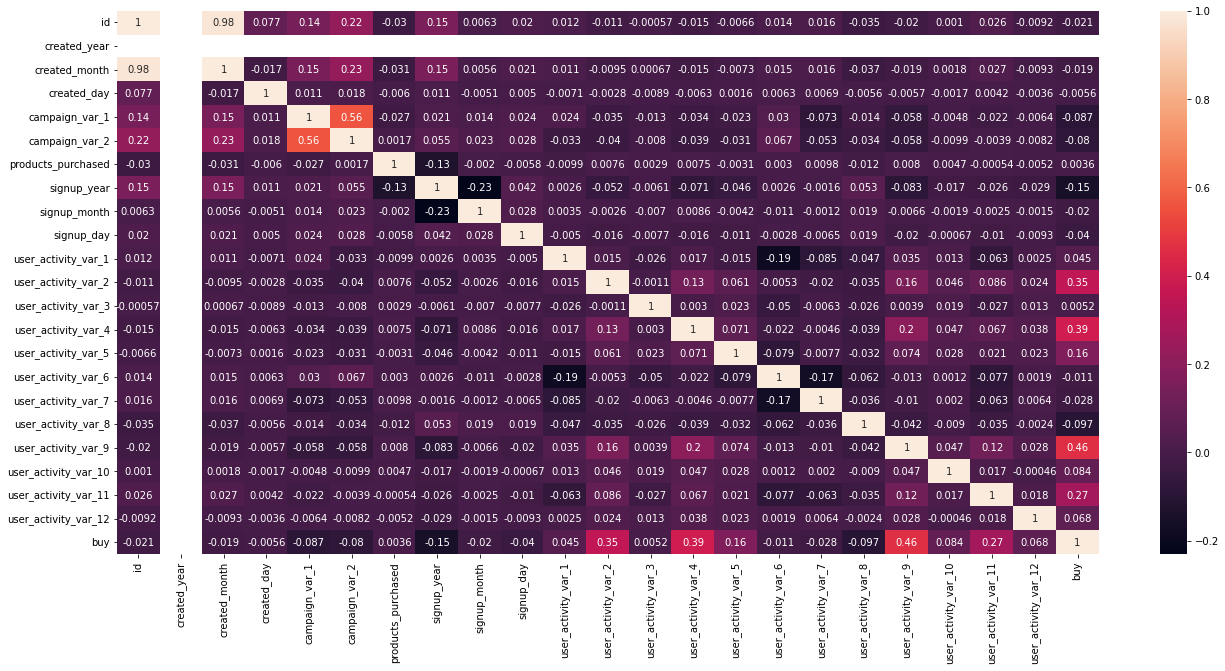

In [32]:
plt.figure(figsize = (22,10))
sns.heatmap(train.corr(), annot=True);

In [37]:
X = train.loc[:,train.columns != 'buy']
X.head()

,id,created_year,created_month,created_day,campaign_var_1,campaign_var_2,products_purchased,signup_year,signup_month,signup_day,...,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,1,2021,1,1,1,2,2.0,2020,9,24,...,0,0,0,0,1,1,0,0,0,0
1,2,2021,1,1,2,1,2.0,2020,9,19,...,1,0,0,0,1,0,0,0,0,0
2,3,2021,1,1,9,3,3.0,2021,8,11,...,0,0,0,0,0,0,0,0,0,0
3,4,2021,1,1,6,7,2.0,2017,10,4,...,0,0,0,0,0,0,0,0,0,0
4,5,2021,1,1,4,6,2.0,2020,6,8,...,0,0,0,0,1,0,0,0,1,0


In [38]:
y = train.buy
y.head()

0    0
1    0
2    0
3    0
4    0
Name: buy, dtype: int64

In [10]:
# train_df['products_purchased'].isnull().value_counts()[1]
# (train_df['buy'] == 1).value_counts()[1]

# train_df['products_purchased'] = ((train_df['buy'] == 1).value_counts()[1] & train_df['products_purchased'].isnull().value_counts()[1])
# x = ((train_df['buy'] == 1).value_counts()[1] & train_df['products_purchased'].isnull().value_counts()[1])
# x

# train_df['products_purchased'] = np.where((train_df['products_purchased'].isnull().value_counts()[1] and (train_df['buy'] == 1).value_counts()[1]), 2.0, 0)

In [11]:
# filling the missing values by mode.

# train_df['products_purchased'].fillna(mode, inplace=True)
# train_df['products_purchased'] = train_df['products_purchased'].fillna(train_df['products_purchased'].mode()[0], inplace=True)

# train_df['products_purchased'] = train_df['products_purchased'].fillna(0)
# train_df['signup_date'] = train_df['signup_date'].fillna(0)

# train_df.head()